SCIKIT LEARN - simple tool for data mining and data analysis
build on NumPy, SciPy and matplotlib


What can we achieve with sklearn? 
1. Classification / identifying with category an object belongs to (spam detection)
2. Regression / perdicting an attribute associated with an object (stock prices predictio, weather prediction)
3. CLustering / automatic grouping of similar objects into sets (customer segmentation)
4. Model Selection / compating, validating and choosing parameters and models (imporoving model accurancy via parameter tuning, compare different models)
5. Dimensionality reduction / reducing the number of random variables to consider (to increase model efficiency, less biased)
6. Preprocessing / feature extraction and normalization (transforming input data such as text for use with ML algos) 


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier #
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder # the most commonly used preprocessing - standardscaler
from sklearn.model_selection import train_test_split #for splitting data into different sections
%matplotlib inline 
#only for Jupiter notebook



In [17]:
wine = pd.read_csv('winequality-data.csv')
wine.tail()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
3913,6.5,0.28,0.38,7.80,0.031,54.0,216.0,0.99154,3.03,0.42,13.1,6,4894
3914,6.6,0.21,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.5,7,4895
3915,8.6,0.18,0.28,0.80,0.032,25.0,78.0,0.99104,2.99,0.38,11.1,5,4896
3916,6.4,0.22,0.38,9.10,0.044,35.0,127.0,0.99326,2.97,0.30,11.0,7,4897
3917,7.2,0.46,0.65,10.40,0.050,76.0,192.0,0.99760,3.16,0.42,8.7,5,4898


In [18]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


In [4]:
wine.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
id                        int64
dtype: object

In [5]:
wine.columns.values

array(['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'id'], dtype=object)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
id                      3918 non-null int64
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [7]:
wine.isnull().head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
wine.isnull().values.any() # faster way

False

In [9]:
wine.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [10]:
df= pd.DataFrame(np.random.randn(5,5,))
df[df>0.3]=pd.np.nan
df.isnull().sum().sum() # to get the total number of all missing values
# how to deal with missing values? or delete or replace with the mean value

11

In [11]:
#Preprocessing of the data
bins = (2, 6, 8) # quaility is between 2 and 8 (actually 3-9). 
# just 2 bins of quality / good and bad/ exact index of 8 - 0 to 8
# 6.5 - spread, we need a higher quality 
group_names= ['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
# cutting the quality and replacing it
wine['quality'].unique()
# why do I have this NaN ?

[bad, good, NaN]
Categories (2, object): [bad < good]

In [12]:
label_quality = LabelEncoder()

In [19]:
wine['quality']=label_quality.fit_transform(wine['quality']) 

In [ ]:
wine.head()

In [ ]:
wine['quality'].value_counts()

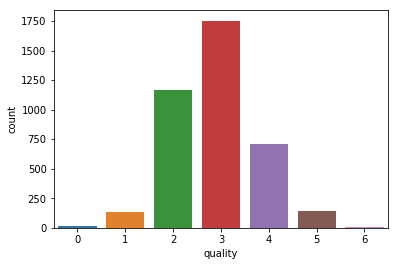

In [20]:
sns.countplot(wine['quality'])

In [39]:
# separate the dataset as response variable and feature variables
X = wine.drop('quality', axis=1)
y= wine['quality']

In [22]:
# train and test splitting data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Applying Standard scaling to get optimized result

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\katya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\katya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [ ]:
X_train # variables now are much more uniform and they were scaled to the same scale

In [ ]:
X_test

### Random Forest Classifier 

In [27]:
# cause it has the leasr amount of moving parts
rfc=RandomForestClassifier(n_estimators=200) # how many models are in, how many forests :)
#used for medium size dataset 
rfc.fit(X_train, y_train)
#our features and quality
pred_rfc=rfc.predict(X_test)

In [28]:
pred_rfc[:20]

array([3, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3],
      dtype=int64)

In [30]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.20      0.32        30
           2       0.69      0.63      0.66       227
           3       0.61      0.79      0.69       340
           4       0.68      0.52      0.59       157
           5       1.00      0.33      0.50        27
           6       0.00      0.00      0.00         2

   micro avg       0.65      0.65      0.65       784
   macro avg       0.53      0.35      0.39       784
weighted avg       0.67      0.65      0.64       784

[[  0   0   1   0   0   0   0]
 [  0   6  15   8   1   0   0]
 [  0   2 143  79   3   0   0]
 [  0   0  43 270  27   0   0]
 [  0   0   4  71  82   0   0]
 [  0   0   0  13   5   9   0]
 [  0   0   0   0   2   0   0]]


C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM Classifier

In [31]:
# works good with smaller numbers 
# fastest and easiest 
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)

In [33]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.10      0.18        30
           2       0.64      0.56      0.59       227
           3       0.53      0.80      0.64       340
           4       0.65      0.30      0.41       157
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00         2

   micro avg       0.57      0.57      0.57       784
   macro avg       0.40      0.25      0.26       784
weighted avg       0.58      0.57      0.54       784

[[  0   0   1   0   0   0   0]
 [  0   3  16  11   0   0   0]
 [  0   0 127  99   1   0   0]
 [  0   0  51 271  18   0   0]
 [  0   0   4 106  47   0   0]
 [  0   0   1  22   4   0   0]
 [  0   0   0   0   2   0   0]]


C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Network

In [ ]:
# big amount of data
# works good with text data analysis  esp. time sensitive 
# good for predicting stock market due to a lange amount of data 
#image processing

In [36]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
# hidden_layer_sizes=(11,11,11) 3 layers of 11 each. we have 11 features
#  the more hidden layers you have the more resources you use 
#max_iter by default is 200, but because we have 3 layers better but higher
# means that it goes 500 times throug the data to program those layer and carefully adjust them 
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

C:\Users\katya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.20      0.27        30
           2       0.62      0.59      0.61       227
           3       0.53      0.70      0.60       340
           4       0.48      0.30      0.37       157
           5       0.33      0.04      0.07        27
           6       0.00      0.00      0.00         2

   micro avg       0.55      0.55      0.55       784
   macro avg       0.34      0.26      0.27       784
weighted avg       0.53      0.55      0.52       784

[[  0   0   1   0   0   0   0]
 [  0   6  14  10   0   0   0]
 [  0   5 135  80   7   0   0]
 [  0   4  63 239  33   1   0]
 [  0   0   4 105  47   1   0]
 [  0   0   1  17   8   1   0]
 [  0   0   0   0   2   0   0]]


C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
